# **Project 9: Heating and cooling power DFAB**

Course: EDE WS 2025-2026 Semester Project

Date: 15.01.2025

Team Members: Aya Abd Alahi, John Riecken

## **1. Introduction**

Briefly describe the dataset and the problem you are solving. What is the target variable? Why is this prediction useful?

Predict: heating_cooling_power without using the valve settings

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
# import data

df = pd.read_csv('../data/dfab_2019_2022_resampled.csv')
df.head()

,Unnamed: 0,time,heating_cooling_power,irrad,kitchen_active_power,setp_371,setp_472,setp_474,setp_476,setp_571,...,y2_574,y3_371,y3_472,y3_476,y3_571,y3_574,y4_371,y5_371,y6_371,y7_371
0,0,2019-07-01 00:00:00,-3.330995,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,1.0,1.0,1.0,1.0,1.0,0.400000,1.0,1.0,1.0,1.0
1,1,2019-07-01 00:15:00,-3.087947,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0
2,2,2019-07-01 00:30:00,-3.441945,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,1.0,1.0,1.0,1.0,1.0,0.600000,1.0,1.0,1.0,1.0
3,3,2019-07-01 00:45:00,-3.274495,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
4,4,2019-07-01 01:00:00,-3.298245,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0


In [4]:
# check metadata
# AI used for encoding

meta_df = pd.read_csv('../data/dfab_metadata.csv', encoding='iso-8859-1')
# Groups by Type and take the first row of data
meta_df.groupby('Type').first()

,NumericID,DescriptiveID,Description,Unit
Type,,,,
Electricity Kitchen,42190064,kitchen_active_power,Kitchen electric active power [kW],dfab
Electricity Total,42190139,total_active_power,Total electric active power [kW],dfab
Heating Cooling,421100172,heating_cooling_power,Heating and cooling power unit [kW],dfab
Index,Index,Index,Index,Index
Setpoint,421110050,setp_371,Temperature setpoint room 272 [°C],dfab
Solar Radiation,3200008,irrad,Global solar irradiation [W/m^2],roof
Temperature Ambient,3200000,temp_amb,Ambient temperature [°C],roof
Temperature Indoor,421110048,temp_371,Temperature room 371 [°C],dfab
Valve,421110008,y1_371,Valve 1 position room 371 [0/1],dfab


The dataset describes measurements taken at distinct regular points in time within a building (NEST). 

The measurements describe:
* the heating and cooling unit power, 
* active electric power (total and from the kitchen),
* solar radiation and ambient temperature on the roof,
* water consumption in showers for two rooms,
* the set temperature and associated actual temperature across 7 rooms (one of which has also shower -Room 571),
* various valve positions for each of the rooms 

In [5]:
# drop excluded variables
to_drop = 'y1_371 y1_472 y1_474 y1_476 y1_571 y1_573 y1_574 y2_371 y2_472 y2_476 y2_571 y2_574 y3_371 y3_472 y3_476 y3_571 y3_574 y4_371 y5_371 y6_371 y7_371'.split()
df.drop(columns=to_drop, inplace=True)
df.head()

,Unnamed: 0,time,heating_cooling_power,irrad,kitchen_active_power,setp_371,setp_472,setp_474,setp_476,setp_571,...,shower_571,temp_371,temp_472,temp_474,temp_476,temp_571,temp_573,temp_574,temp_amb,total_active_power
0,0,2019-07-01 00:00:00,-3.330995,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,0.0,27.500000,26.5,28.0,29.0,31.0,30.500000,31.5,25.926667,0.575526
1,1,2019-07-01 00:15:00,-3.087947,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,0.0,27.500000,26.5,28.0,29.0,30.8,30.500000,31.5,25.586667,0.689346
2,2,2019-07-01 00:30:00,-3.441945,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,0.0,27.500000,26.5,28.0,29.0,30.5,30.500000,31.5,25.373333,0.675612
3,3,2019-07-01 00:45:00,-3.274495,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,0.0,27.500000,26.5,28.0,29.0,30.5,30.466667,31.5,25.333333,0.566832
4,4,2019-07-01 01:00:00,-3.298245,0.0,0.0,25.0,22.0,22.0,19.0,25.5,...,0.0,27.333333,26.5,28.0,29.0,30.5,30.000000,31.2,24.900000,0.481446


In [6]:
df.shape

(140256, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             140256 non-null  int64  
 1   time                   140256 non-null  object 
 2   heating_cooling_power  138446 non-null  float64
 3   irrad                  137900 non-null  float64
 4   kitchen_active_power   138625 non-null  float64
 5   setp_371               132951 non-null  float64
 6   setp_472               133554 non-null  float64
 7   setp_474               132949 non-null  float64
 8   setp_476               132360 non-null  float64
 9   setp_571               132951 non-null  float64
 10  setp_573               132675 non-null  float64
 11  setp_574               132663 non-null  float64
 12  shower_471             138776 non-null  float64
 13  shower_571             137960 non-null  float64
 14  temp_371               137795 non-nu

### **Initial Look at the Dataset**

- all columns (except time) are floats, making preprocessing easier
- all columns have contain nulls as the non-null counts are all less than those in 'time'
  - in the source material values outside of a defined range for each measurement were set to *Missing Value* 
  - there were also network outages and temporarily defected sensors which caused NaNs
- Time is an object and not recognised by pandas as a time
- extra column (unnamed) for the index is not needed

## **2. Part 1: Exploratory Data Analysis (EDA)**

### **2.1 Statistical Summary**

Show basic stats (mean, median, std dev) and handle any missing values.

In [8]:
focus_cols = ['heating_cooling_power', 'irrad', 'total_active_power', 'kitchen_active_power',
    'temp_amb', 'shower_471', 'setp_371', 'temp_371']

df[focus_cols].describe()

,heating_cooling_power,irrad,total_active_power,kitchen_active_power,temp_amb,shower_471,setp_371,temp_371
count,138446.000000,137900.000000,138936.000000,138625.000000,139273.000000,138776.000000,132951.000000,137795.000000
mean,0.157416,184.621133,-0.105771,0.041175,12.073460,0.005121,22.138905,23.571796
std,1.833801,303.647495,1.437322,0.211394,8.459903,0.163586,2.403091,2.109775
min,-8.420386,0.000000,-6.151530,0.000000,-9.940000,0.000000,10.000000,18.500000
25%,-1.113597,0.000000,-0.376740,0.000000,5.306667,0.000000,22.000000,22.000000
50%,0.000000,11.266667,0.443226,0.000000,11.566667,0.000000,22.000000,23.000000
75%,1.496797,249.133333,0.644574,0.000000,18.033333,0.000000,23.500000,25.000000
max,6.418994,1250.000000,7.180404,5.157067,40.120000,28.270000,28.000000,46.000000


In [9]:
# chceck for missing values
df.isna().sum()

Unnamed: 0                  0
time                        0
heating_cooling_power    1810
irrad                    2356
kitchen_active_power     1631
setp_371                 7305
setp_472                 6702
setp_474                 7307
setp_476                 7896
setp_571                 7305
setp_573                 7581
setp_574                 7593
shower_471               1480
shower_571               2296
temp_371                 2461
temp_472                 2546
temp_474                 2806
temp_476                 3370
temp_571                 3018
temp_573                 2835
temp_574                 2895
temp_amb                  983
total_active_power       1320
dtype: int64

In [10]:
# columns ok to have zeros: heating_coolling, irrad, active elec, shower
# check columns: amb_temp, indoor temp, set temp

# df[df['temp_amb'] == 0]b
df[df['temp_amb'].isna()]

,Unnamed: 0,time,heating_cooling_power,irrad,kitchen_active_power,setp_371,setp_472,setp_474,setp_476,setp_571,...,shower_571,temp_371,temp_472,temp_474,temp_476,temp_571,temp_573,temp_574,temp_amb,total_active_power
5286,5286,2019-08-25 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5287,5287,2019-08-25 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5288,5288,2019-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5289,5289,2019-08-25 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5290,5290,2019-08-25 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,35035,2022-06-30 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105212,35036,2022-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105213,35037,2022-06-30 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105214,35038,2022-06-30 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# with ~140k rows try dropping all NaNs and removing Unnamed
df_clean = df.dropna()
df_clean = df_clean.drop(columns='Unnamed: 0')
df_clean.shape

(130303, 22)

In [12]:
df_clean.isna().sum()

time                     0
heating_cooling_power    0
irrad                    0
kitchen_active_power     0
setp_371                 0
setp_472                 0
setp_474                 0
setp_476                 0
setp_571                 0
setp_573                 0
setp_574                 0
shower_471               0
shower_571               0
temp_371                 0
temp_472                 0
temp_474                 0
temp_476                 0
temp_571                 0
temp_573                 0
temp_574                 0
temp_amb                 0
total_active_power       0
dtype: int64

In [13]:
# chekc duplicates
# df['time'].duplicated().sum()
df_clean.duplicated().sum()

np.int64(0)

In [14]:
# convert Time to timeseries dtype
df_clean['time'] = pd.to_datetime(df['time'])
df_clean = df_clean.set_index('time')
df_clean = df_clean.sort_values('time')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130303 entries, 2019-07-01 00:00:00 to 2023-06-29 23:45:00
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   heating_cooling_power  130303 non-null  float64
 1   irrad                  130303 non-null  float64
 2   kitchen_active_power   130303 non-null  float64
 3   setp_371               130303 non-null  float64
 4   setp_472               130303 non-null  float64
 5   setp_474               130303 non-null  float64
 6   setp_476               130303 non-null  float64
 7   setp_571               130303 non-null  float64
 8   setp_573               130303 non-null  float64
 9   setp_574               130303 non-null  float64
 10  shower_471             130303 non-null  float64
 11  shower_571             130303 non-null  float64
 12  temp_371               130303 non-null  float64
 13  temp_472               130303 non-null  float64
 14  te

In [15]:
df_clean.head()

,heating_cooling_power,irrad,kitchen_active_power,setp_371,setp_472,setp_474,setp_476,setp_571,setp_573,setp_574,...,shower_571,temp_371,temp_472,temp_474,temp_476,temp_571,temp_573,temp_574,temp_amb,total_active_power
time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,-3.330995,0.0,0.0,25.0,22.0,22.0,19.0,25.5,22.0,19.0,...,0.0,27.500000,26.5,28.0,29.0,31.0,30.500000,31.5,25.926667,0.575526
2019-07-01 00:15:00,-3.087947,0.0,0.0,25.0,22.0,22.0,19.0,25.5,22.0,19.0,...,0.0,27.500000,26.5,28.0,29.0,30.8,30.500000,31.5,25.586667,0.689346
2019-07-01 00:30:00,-3.441945,0.0,0.0,25.0,22.0,22.0,19.0,25.5,22.0,19.0,...,0.0,27.500000,26.5,28.0,29.0,30.5,30.500000,31.5,25.373333,0.675612
2019-07-01 00:45:00,-3.274495,0.0,0.0,25.0,22.0,22.0,19.0,25.5,22.0,19.0,...,0.0,27.500000,26.5,28.0,29.0,30.5,30.466667,31.5,25.333333,0.566832
2019-07-01 01:00:00,-3.298245,0.0,0.0,25.0,22.0,22.0,19.0,25.5,22.0,19.0,...,0.0,27.333333,26.5,28.0,29.0,30.5,30.000000,31.2,24.900000,0.481446


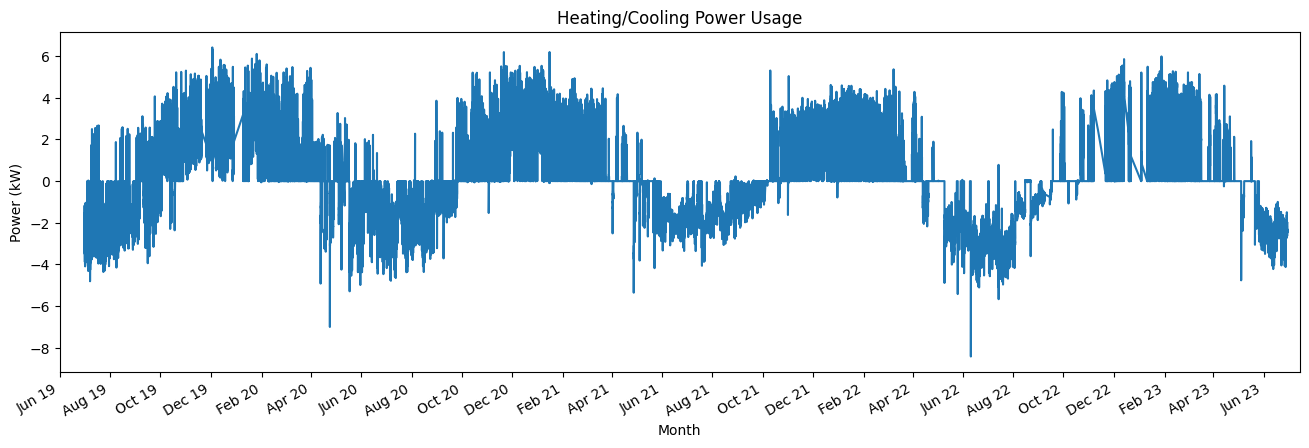

In [16]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(df_clean.index, df_clean['heating_cooling_power'])
# ax.xaxis.set_major_locator(mdates.MonthLocator())

# # 3. Set the format to show the Month name or number (e.g., 'Jan', 'Feb' or '2025-01')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # '%b' for short month name like Jan

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# 4. Clean up the look
plt.title('Heating/Cooling Power Usage')
plt.xlabel('Month')
plt.ylabel('Power (kW)')

# Ensure layout doesn't clip labels
fig.autofmt_xdate()
plt.xlim(left=pd.Timestamp('2019-06-01'), right=pd.Timestamp('2023-07-15'))
plt.show()


The Power Usage graph shows that negative power is recorded in summer months. Therefore power used for cooling will be taken as negative power and power used for heating will be positive power, and 0-values will be taken as turned off.

### **2.2 Visual Exploration**

Focussed plots (Histograms, Boxplots) that reveal insights about the data distribution.

The system is off 28.72% of the time.


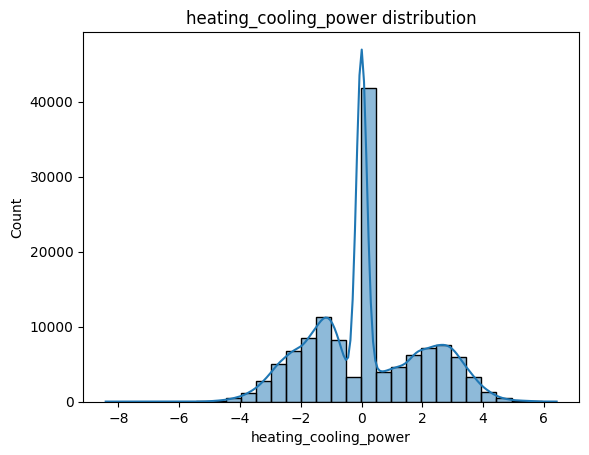

In [17]:
sns.histplot(data=df_clean['heating_cooling_power'], kde=True, bins=30)
plt.title('heating_cooling_power distribution')

# heavily modal around 0, meaning it's predominantly off
# The percentage of time the system is off
off_percentage = (df_clean['heating_cooling_power'] == 0).mean() * 100

print(f"The system is off {off_percentage:.2f}% of the time.")

Text(0.5, 1.0, 'heating_cooling_power when unit is ON')

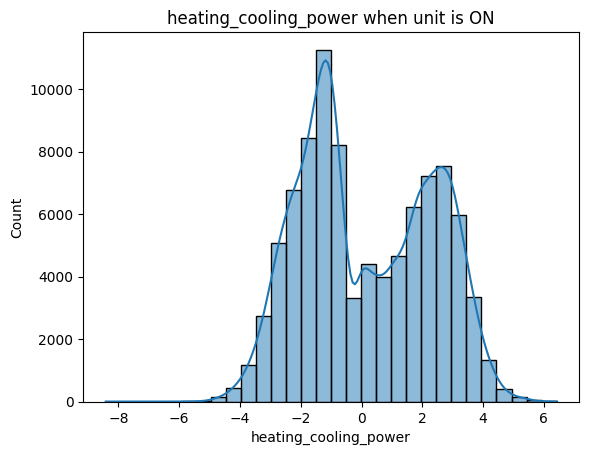

In [18]:
# when the system is on
# View the distribution ONLY when the system is actually running
sns.histplot(df_clean[df_clean['heating_cooling_power'] != 0]['heating_cooling_power'], kde=True, bins=30)
plt.title('heating_cooling_power when unit is ON')

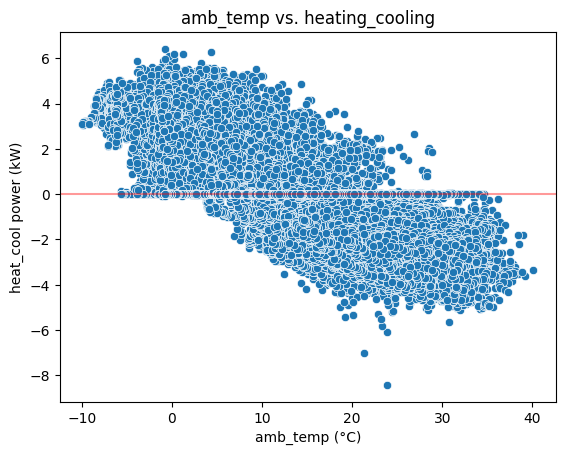

In [19]:
# check if there is correlation between ambient outside temp and switching unit ON
sns.scatterplot(data=df_clean, x='temp_amb', y='heating_cooling_power')
plt.axhline(0, color='r', alpha=0.4)
plt.title('amb_temp vs. heating_cooling')
plt.xlabel('amb_temp (°C)')
plt.ylabel('heat_cool power (kW)')
plt.show()

# unfortunately no discernable threshold for which temperature the unit is ON

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130303 entries, 2019-07-01 00:00:00 to 2023-06-29 23:45:00
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   heating_cooling_power  130303 non-null  float64
 1   irrad                  130303 non-null  float64
 2   kitchen_active_power   130303 non-null  float64
 3   setp_371               130303 non-null  float64
 4   setp_472               130303 non-null  float64
 5   setp_474               130303 non-null  float64
 6   setp_476               130303 non-null  float64
 7   setp_571               130303 non-null  float64
 8   setp_573               130303 non-null  float64
 9   setp_574               130303 non-null  float64
 10  shower_471             130303 non-null  float64
 11  shower_571             130303 non-null  float64
 12  temp_371               130303 non-null  float64
 13  temp_472               130303 non-null  float64
 14  te

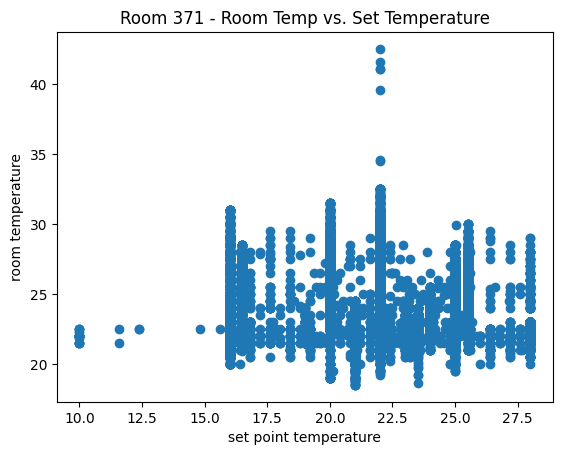

In [21]:
plt.scatter(x=df_clean['setp_371'], y=df_clean['temp_371'])
plt.title(f'Room 371 - Room Temp vs. Set Temperature')
plt.xlabel('set point temperature')
plt.ylabel('room temperature')
plt.show()

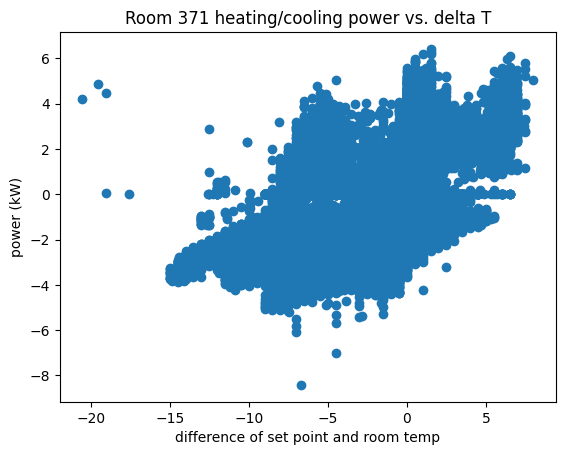

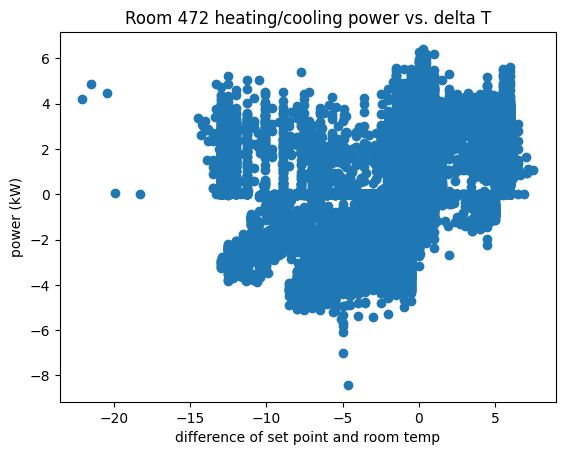

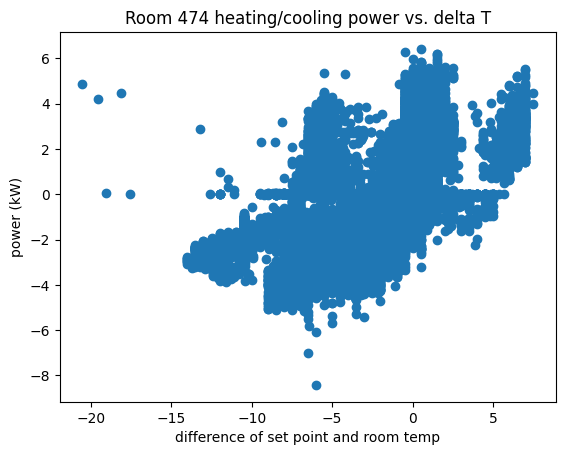

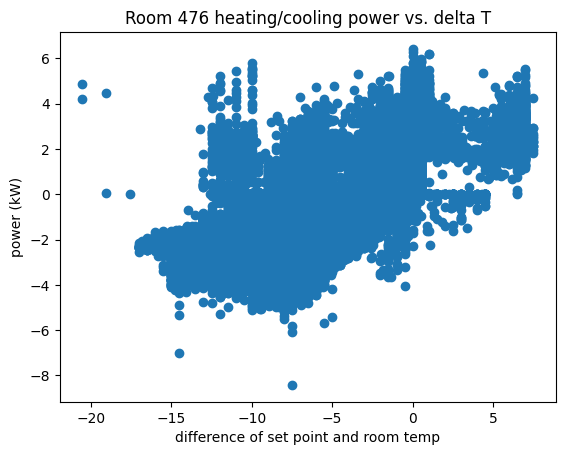

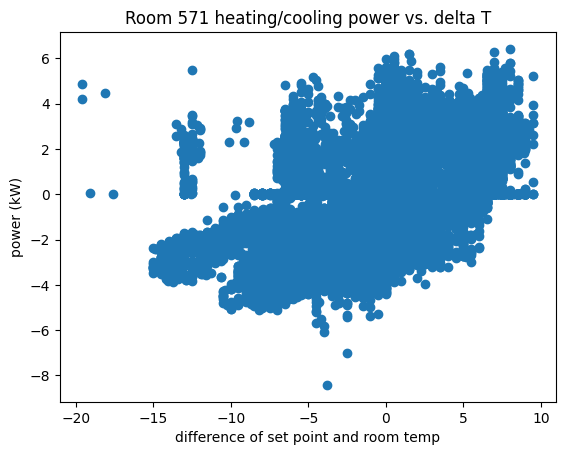

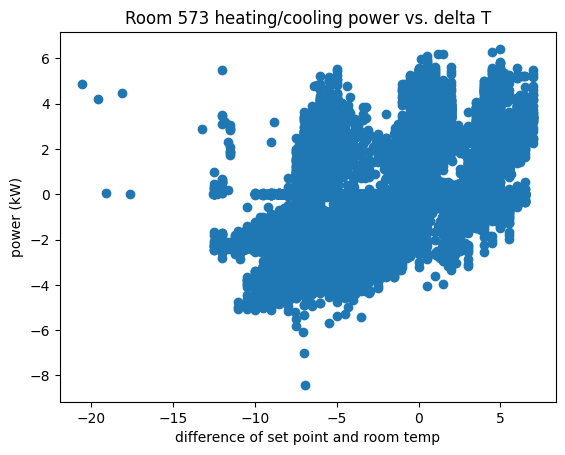

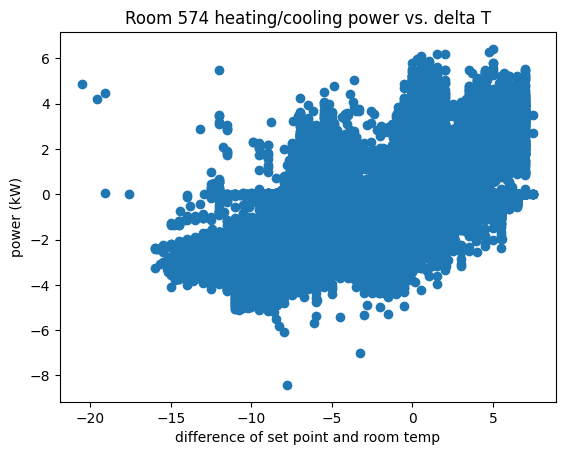

In [24]:
room_nums = ['371', '472', '474', '476', '571', '573', '574']

for room in room_nums:
    df_clean[f'delta_T_{room}'] = df_clean[f'setp_{room}'] - df_clean[f'temp_{room}']
    plt.scatter(x=df_clean[f'delta_T_{room}'], y=df_clean['heating_cooling_power'])
    plt.title(f'Room {room} heating/cooling power vs. delta T')
    plt.xlabel('difference of set point and room temp')
    plt.ylabel('power (kW)')
    plt.show()

## **2.3 Correlation Analysis**

Heatmaps or scatter plots showing the relationship between features and the target variable.

## **3. Part 2: Linear Regression Modeling**

### **3.1 Data Preprocessing**

Train-test splits, scaling, or encoding categorical variables.

### **3.2 Model Iterations (The 5 Models)**

List and train your five variations here (e.g., Simple Linear, Multi-feature, Polynomial, Lasso/Ridge).

### **3.3 Feature Engineering & Selection**

Explain the systematic approach used to find the best feature set (e.g., RFE or SelectKBest).

## **4. Evaluation & Model Selection**

### 4.1 Cross-Validation Results
Use k-fold cross-validation to show the stability of your models.

### **4.2 Visual Comparison**

Plotting Predicted vs. Actual values or Residual plots for all models.

### **4.3 Final Model DescriptionWhy did you pick this model?**

Discuss its structure ($R^2$, RMSE) and how it balances bias and variance.

## **5. Appendix**

### **5.1 Contribution Matrix**


### **5.2 Sources & AI Transparency**

Libraries: NumPy, Pandas, Scikit-Learn, Matplotlib.

External Data: [Link to source].

AI Usage Disclosure: * LLM used for: Debugging the cross-validation loop and generating the Markdown table structures.

Human intervention: All statistical interpretations and final model selection decisions were made by the team.